In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import patches


In [2]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('train.csv')
print(train.head())

   Unnamed: 0 image_names cell_type  xmin  xmax  ymin  ymax
0           0       8.jpg       WBC   193   387    92   285
1           1       8.jpg       RBC    17   134   298   402
2           2       8.jpg       RBC    64   175   372   479
3           3       8.jpg       RBC   119   230   330   437
4           4       8.jpg       RBC   169   259   265   374


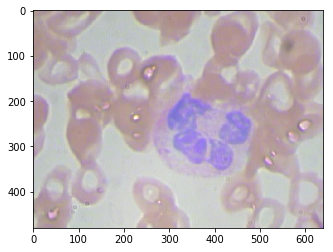

In [11]:
# reading single image using imread function of matplotlib
path_img1 = '/Users/JINGLISHI/Desktop/NUS_Course/AppliedResearch/brain_proj1/BCCD/JPEGImages/1.jpg'
image = plt.imread(path_img1)
plt.imshow(image)
plt.show()

In [3]:
# Number of unique training images
train['image_names'].nunique()

10

In [5]:
# Number of classes
train['cell_type'].value_counts()

RBC          162
WBC           10
Platelets      9
Name: cell_type, dtype: int64

NameError: name 'path_img1' is not defined

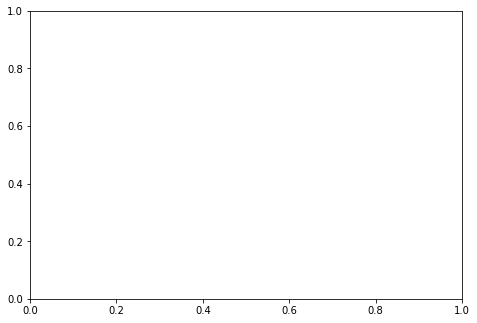

In [6]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread(path_img1)
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "1.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [7]:
data = pd.DataFrame()
data['format'] = train['image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')
print('export to annotate.txt')

export to annotate.txt
